In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")

print(df.head())
print("\n-----------Info-----------")
print(df.info())
print("\n---------Describe---------")
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

-----------Info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

---------Describe---------
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000

Пропуски

In [2]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Дубликаты

In [3]:
df[df.duplicated(keep=False)]

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


Подозрительные случаи

In [4]:
print("Отрицательные покупки")
df[df['purchases'] < 0]

Отрицательные покупки


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [5]:
print("Слишком большой или маленький возраст")
df[(df['age'] > 100) | (df['age'] < 10)]

Слишком большой или маленький возраст


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [6]:
print("Нулевой revenue при ненулевых purchases или наоборот")
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

Нулевой revenue при ненулевых purchases или наоборот


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


EDA

In [7]:
print("Частоты по странам")
df['country'].value_counts()

Частоты по странам


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [8]:
print("Группировка по стране: средние purchases и revenue")
df.groupby('country')[['purchases', 'revenue']].agg(['mean', 'sum'])

Группировка по стране: средние purchases и revenue


purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459

In [9]:
print("Возрастные группы")
mask = (df['age'] >= 10) & (df['age'] <= 100)
df.loc[mask, 'age_group'] = pd.cut(df.loc[mask, 'age'], bins=[0, 20, 35, 50, 100], labels=['0-20', '21-35', '36-50', '51+'])
df.loc[mask, 'age_group'].value_counts()

Возрастные группы


age_group
21-35    20
36-50     9
51+       6
0-20      2
Name: count, dtype: int64

Визуализация данных в Matplotlib

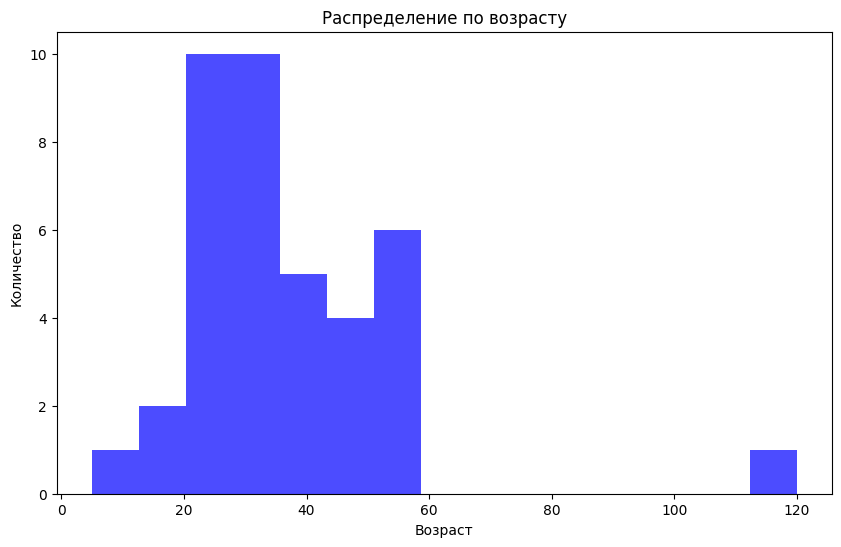

In [10]:
# Гистограмма возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, color='blue', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение по возрасту')
plt.savefig('figures/age_hist.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

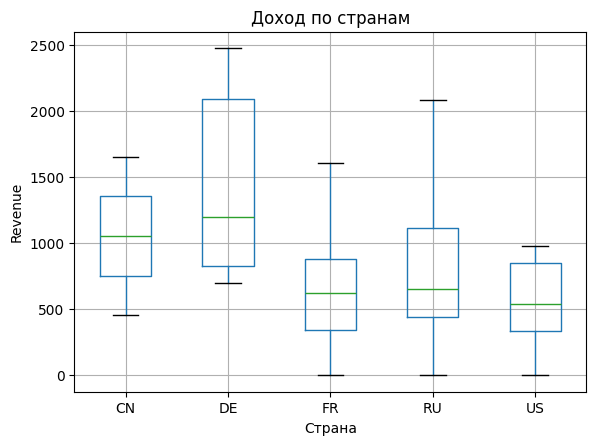

In [11]:

# Боксплот
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country')
plt.xlabel('Страна')
plt.ylabel('Revenue')
plt.title('Доход по странам')
plt.suptitle('')
plt.savefig('figures/revenue_box.png')
plt.show()

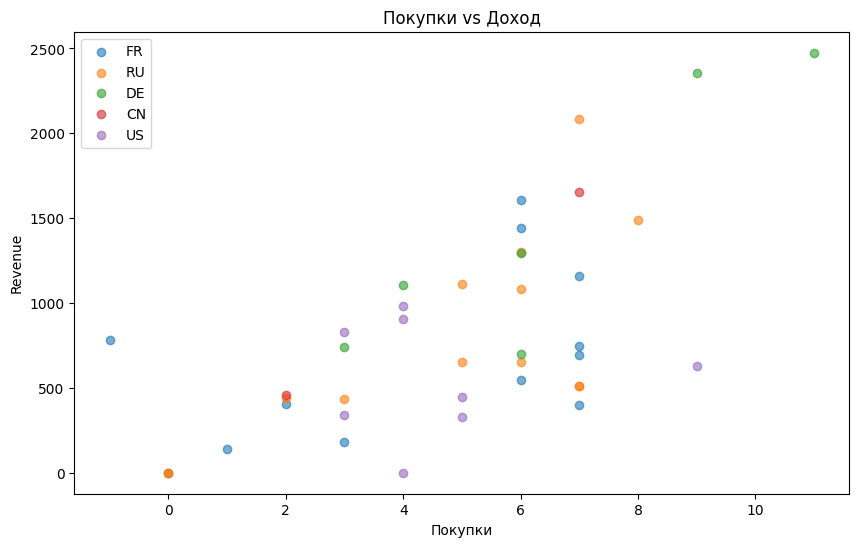

In [12]:
# Скаттер
plt.figure(figsize=(10, 6))
for country in df['country'].unique():
    data = df[df['country'] == country]
    plt.scatter(data['purchases'], data['revenue'], label=country, alpha=0.6)
plt.xlabel('Покупки')
plt.ylabel('Revenue')
plt.title('Покупки vs Доход')
plt.legend()
plt.savefig('figures/scatter.png')
plt.show()